In [ ]:
from itertools import product

import pandas as pd
from tqdm import tqdm

import sys
sys.path.append("../../")

import gym
import matplotlib.pyplot as plt

from Nabatchikov_practice5.Nabatchikov_practice5_1 import DQN
from Nabatchikov_practice5.Nabatchikov_practice5_2 import DQNHard, DQNSoft, DDQN
from Nabatchikov_practice2.Nabatchikov_practice2_1 import CEM
pd.set_option('display.max_rows', 500)

In [16]:
columns=["episode_n", "t_max", "layer_size", "gamma", "mean_total_reward", "last_total_reward"]

In [17]:
env = gym.make('Acrobot-v1')
state_dim = env.observation_space.shape[0]
action_dim = env.action_space.n

In [18]:
def get_best_params(df):
    best_params = df[df.last_total_reward == df.last_total_reward.max()]
    best_params = best_params[best_params.mean_total_reward == best_params.mean_total_reward.max()]
    return best_params

# DQN

In [19]:
task_1_df = []
results_1 = []

episode_n_arr = (100, 200, 300)
t_max_arr = (500, 1000)
layer_size_arr = (64, 128, 256)
gamma_arr = (0.9, 0.99)
for episode_n, t_max, layer_size, gamma in tqdm(product(episode_n_arr, t_max_arr, layer_size_arr, gamma_arr)):
    agent = DQN(state_dim, action_dim, layer_size=layer_size, gamma=gamma, batch_size=layer_size)
    rewards, mean_rewards = agent.train(env=env, episode_n=episode_n, t_max=t_max)
    label = f"episode_n: {episode_n}, t_max: {t_max}, layer_size: {layer_size}, gamma: {gamma}"
    results_1.append({"label": label, "rewards": rewards, "mean_rewards": mean_rewards})
    task_1_df.append([episode_n, t_max, layer_size, gamma, mean_rewards, rewards[-1]])


36it [23:36, 39.35s/it]


In [53]:
df = pd.DataFrame(task_1_df, columns=columns)
df.sort_values(by="last_total_reward", ascending=False)

,episode_n,t_max,layer_size,gamma,mean_total_reward,last_total_reward
33,300,1000,128,0.99,-122.763333,-74.0
35,300,1000,256,0.99,-116.063333,-76.0
29,300,500,256,0.99,-122.973333,-86.0
9,100,1000,128,0.99,-148.190000,-91.0
17,200,500,256,0.99,-129.440000,-94.0
27,300,500,128,0.99,-120.030000,-94.0
13,200,500,64,0.99,-135.900000,-97.0
25,300,500,64,0.99,-122.800000,-102.0
5,100,500,256,0.99,-135.250000,-102.0
16,200,500,256,0.90,-231.770000,-107.0


In [21]:
get_best_params(df)

,episode_n,t_max,layer_size,gamma,mean_total_reward,last_total_reward
33,300,1000,128,0.99,-122.763333,-74.0


In [22]:
dqn_list = sorted(results_1, key=lambda x: x["rewards"][-1], reverse=True)

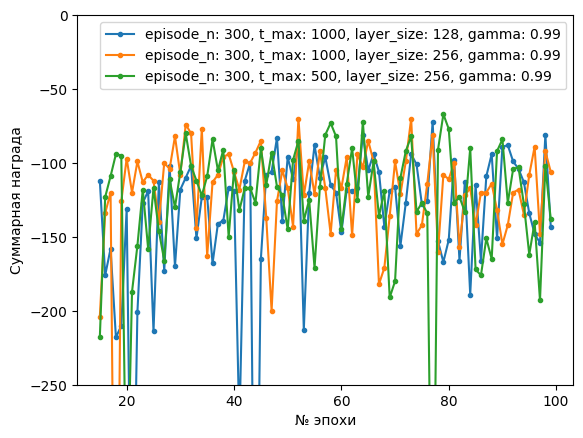

In [67]:
for exp in dqn_list[:3]:
    plt.plot(range(15, 100), exp["rewards"][15:100], marker='o', label=exp["label"], markersize=3)

plt.xlabel('№ эпохи')
plt.ylim(-250, 0)
plt.ylabel('Суммарная награда')
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.show()

In [58]:
agent = CEM(state_dim=6, action_n=3)
dce_result = agent.fit(env=env, epochs=100, q_param=0.9, trajectory_n=200, trajectory_len=300)
deep_cross_entropy_reward = [r["mean_total_reward"] for r in dce_result["info"]]

/Users/ilyanabatchikov/Library/Caches/pypoetry/virtualenvs/ods-deep-rl-e31fa5SG-py3.10/lib/python3.10/site-packages/torch/nn/modules/module.py:1518: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


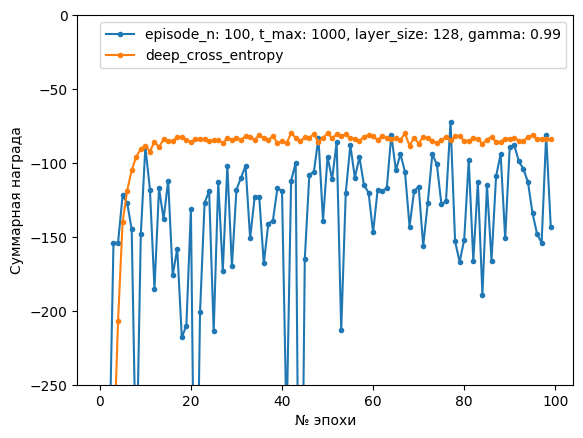

In [66]:
plt.plot(range(100), dqn_list[0]["rewards"][:100], marker='o', label=exp["label"], markersize=3)
plt.plot(range(100), deep_cross_entropy_reward, marker='o', label="deep_cross_entropy", markersize=3)

plt.xlabel('№ эпохи')
plt.ylim(-250, 0)
plt.ylabel('Суммарная награда')
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.show()

# DQNHard

In [25]:
task_2_df = []
results_2 = []

episode_n_arr = (100, 200, 300)
t_max_arr = (500, 1000)
layer_size_arr = (64, 128, 256)
gamma_arr = (0.9, 0.99)
for episode_n, t_max, layer_size, gamma in tqdm(product(episode_n_arr, t_max_arr, layer_size_arr, gamma_arr)):
    agent = DQNHard(state_dim, action_dim, layer_size=layer_size, gamma=gamma, batch_size=layer_size)
    rewards, mean_rewards = agent.train(env=env, episode_n=episode_n, t_max=t_max)
    label = f"episode_n: {episode_n}, t_max: {t_max}, layer_size: {layer_size}, gamma: {gamma}"
    results_2.append({"label": label, "rewards": rewards, "mean_rewards": mean_rewards})
    task_2_df.append([episode_n, t_max, layer_size, gamma, mean_rewards, rewards[-1]])


36it [22:31, 37.55s/it]


In [54]:
df = pd.DataFrame(task_2_df, columns=columns)
df.sort_values(by="last_total_reward", ascending=False)

,episode_n,t_max,layer_size,gamma,mean_total_reward,last_total_reward
23,200,1000,256,0.99,-102.580000,-64.0
9,100,1000,128,0.99,-126.640000,-73.0
3,100,500,128,0.99,-118.950000,-74.0
33,300,1000,128,0.99,-109.790000,-74.0
29,300,500,256,0.99,-101.136667,-76.0
15,200,500,128,0.99,-114.575000,-77.0
17,200,500,256,0.99,-113.985000,-81.0
27,300,500,128,0.99,-109.786667,-81.0
35,300,1000,256,0.99,-98.186667,-82.0
25,300,500,64,0.99,-104.683333,-85.0


In [27]:
get_best_params(df)

,episode_n,t_max,layer_size,gamma,mean_total_reward,last_total_reward
23,200,1000,256,0.99,-102.58,-64.0


In [28]:
dqn_hard_list = sorted(results_2, key=lambda x: x["rewards"][-1], reverse=True)

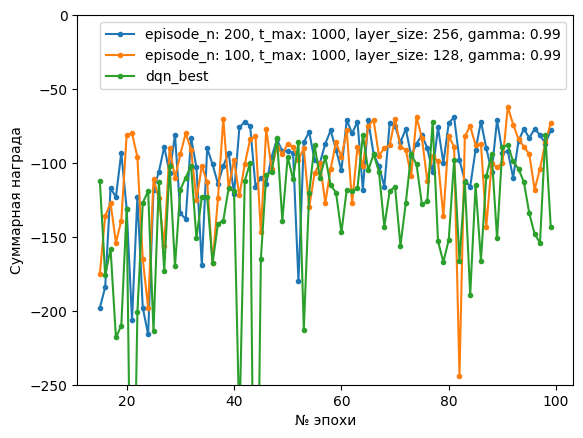

In [65]:
dqn_best = dqn_list[0]
for exp in dqn_hard_list[:2]:
    plt.plot(range(15, 100), exp["rewards"][15:100], marker='o', label=exp["label"], markersize=3)


plt.plot(range(15, 100), dqn_best["rewards"][15:100], marker='o', label="dqn_best", markersize=3)

plt.xlabel('№ эпохи')
plt.ylim(-250, 0)
plt.ylabel('Суммарная награда')
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.show()

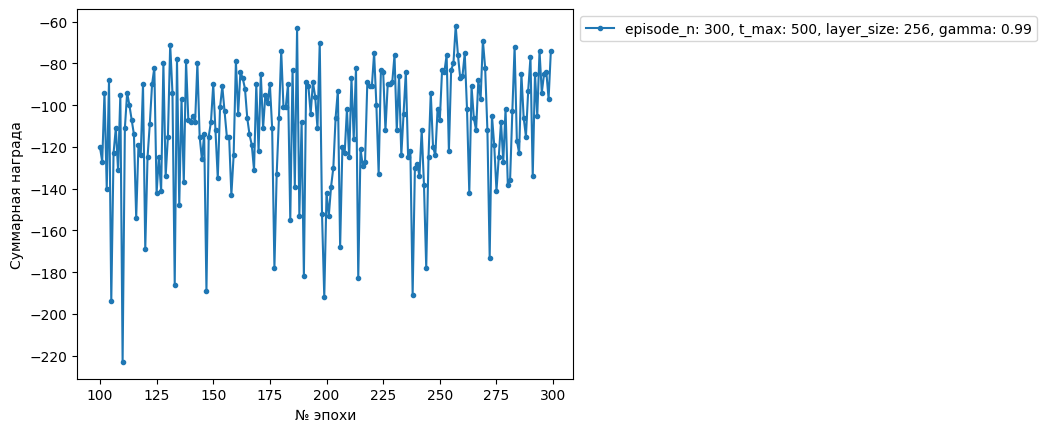

In [45]:
plt.show()
plt.plot(range(100, 300), dqn_list[0]["rewards"][100:], marker='o', label=exp["label"], markersize=3)

plt.xlabel('№ эпохи')
plt.ylabel('Суммарная награда')
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.show()

# DQN SOFT

In [30]:
task_3_df = []
results_3 = []

episode_n_arr = (100, 200, 300)
t_max_arr = (500, 1000)
layer_size_arr = (64, 128, 256)
gamma_arr = (0.9, 0.99)
for episode_n, t_max, layer_size, gamma in tqdm(product(episode_n_arr, t_max_arr, layer_size_arr, gamma_arr)):
    agent = DQNSoft(state_dim, action_dim, layer_size=layer_size, gamma=gamma, batch_size=layer_size)
    rewards, mean_rewards = agent.train(env=env, episode_n=episode_n, t_max=t_max)
    label = f"episode_n: {episode_n}, t_max: {t_max}, layer_size: {layer_size}, gamma: {gamma}"
    results_3.append({"label": label, "rewards": rewards, "mean_rewards": mean_rewards})
    task_3_df.append([episode_n, t_max, layer_size, gamma, mean_rewards, rewards[-1]])


36it [23:16, 38.78s/it]


In [48]:
df = pd.DataFrame(task_3_df, columns=columns)
df.sort_values(by="last_total_reward", ascending=False)

,episode_n,t_max,layer_size,gamma,mean_total_reward,last_total_reward
11,100,1000,256,0.99,-116.030000,-62.0
19,200,1000,64,0.99,-119.305000,-70.0
17,200,500,256,0.99,-103.170000,-71.0
23,200,1000,256,0.99,-107.945000,-75.0
27,300,500,128,0.99,-105.220000,-75.0
15,200,500,128,0.99,-106.335000,-77.0
29,300,500,256,0.99,-101.846667,-78.0
35,300,1000,256,0.99,-109.386667,-79.0
25,300,500,64,0.99,-94.606667,-83.0
31,300,1000,64,0.99,-117.196667,-85.0


In [32]:
get_best_params(df)

,episode_n,t_max,layer_size,gamma,mean_total_reward,last_total_reward
11,100,1000,256,0.99,-116.03,-62.0


In [33]:
dqn_soft_list = sorted(results_3, key=lambda x: x["rewards"][-1], reverse=True)

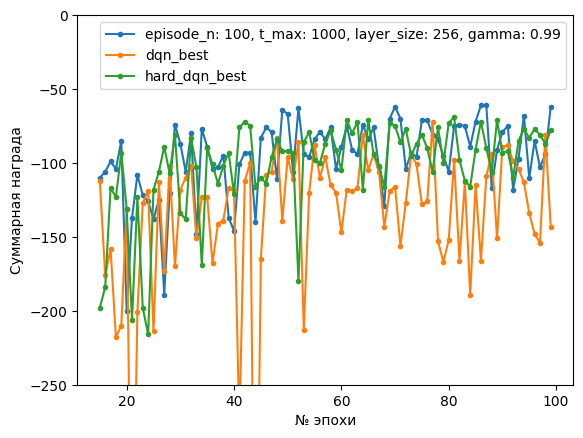

In [64]:
dqn_best = dqn_list[0]
hard_dqn_best = dqn_hard_list[0]
for exp in dqn_soft_list[:1]:
    plt.plot(range(15, 100), exp["rewards"][15:100], marker='o', label=exp["label"], markersize=3)


plt.plot(range(15, 100), dqn_best["rewards"][15:100], marker='o', label="dqn_best", markersize=3)
plt.plot(range(15, 100), hard_dqn_best["rewards"][15:100], marker='o', label="hard_dqn_best", markersize=3)

plt.xlabel('№ эпохи')
plt.ylim(-250, 0)
plt.ylabel('Суммарная награда')
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.show()

# DDQN

In [75]:
import random

import numpy as np
import torch

from Nabatchikov_practice5.Nabatchikov_practice5_1 import DQN, Qfunction


class DDQN(DQN):
    def __init__(
        self, state_dim, action_dim, layer_size, gamma=0.99, lr=1e-3, batch_size=64,
        epsilon_decrease=0.01, epsilon_min=0.01
        ):
        super().__init__(state_dim, action_dim, layer_size, gamma, lr, batch_size, epsilon_decrease, epsilon_min)
        self.target_q_function = Qfunction(state_dim, action_dim, layer_size)

    def fit(self, state, action, reward, done, next_state):
        self.memory.append([state, action, reward, int(done), next_state])

        if len(self.memory) > self.batch_size:
            batch = random.sample(self.memory, self.batch_size)
            states, actions, rewards, dones, next_states = map(torch.tensor, list(zip(*batch)))

            with torch.no_grad():
                best_actions = torch.argmax(self.q_function(next_states), dim=1)
                targets = rewards + self.gamma * (1 - dones) * self.target_q_function(next_states)[
                    torch.arange(self.batch_size), best_actions]

            q_values = self.q_function(states)[torch.arange(self.batch_size), actions]

            loss = torch.mean((q_values - targets.detach()) ** 2)
            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()

            if self.epsilon > self.epsilon_min:
                self.epsilon -= self.epsilon_decrease

    def update_target_network(self):
        self.target_q_function.load_state_dict(self.q_function.state_dict())

    def train(self, env, episode_n=100, t_max=500, target_update=10):
        rewards = []
        for episode in range(episode_n):
            total_reward = 0
            state = env.reset()
            for t in range(t_max):
                action = self.get_action(state)
                next_state, reward, done, _ = env.step(action)
                total_reward += reward
                self.fit(state, action, reward, done, next_state)
                state = next_state

                if done:
                    break

                if t % target_update == 0:
                    self.update_target_network()

            rewards.append(total_reward)
        return rewards, np.mean(rewards)

In [76]:
task_4_df = []
results_4 = []

episode_n_arr = (100, 200, 300)
t_max_arr = (500, 1000)
layer_size_arr = (64, 128, 256)
gamma_arr = (0.9, 0.99)
for episode_n, t_max, layer_size, gamma in tqdm(product(episode_n_arr, t_max_arr, layer_size_arr, gamma_arr)):
    agent = DDQN(state_dim, action_dim, layer_size=layer_size, gamma=gamma, batch_size=layer_size)
    rewards, mean_rewards = agent.train(env=env, episode_n=episode_n, t_max=t_max)
    label = f"episode_n: {episode_n}, t_max: {t_max}, layer_size: {layer_size}, gamma: {gamma}"
    results_4.append({"label": label, "rewards": rewards, "mean_rewards": mean_rewards})
    task_4_df.append([episode_n, t_max, layer_size, gamma, mean_rewards, rewards[-1]])


36it [22:33, 37.59s/it]


In [77]:
df = pd.DataFrame(task_4_df, columns=columns)
df.sort_values(by="last_total_reward", ascending=False)

,episode_n,t_max,layer_size,gamma,mean_total_reward,last_total_reward
13,200,500,64,0.99,-115.085000,-62.0
25,300,500,64,0.99,-108.260000,-80.0
21,200,1000,128,0.99,-101.275000,-80.0
29,300,500,256,0.99,-101.030000,-84.0
11,100,1000,256,0.99,-121.280000,-84.0
5,100,500,256,0.99,-116.810000,-86.0
3,100,500,128,0.99,-130.720000,-87.0
9,100,1000,128,0.99,-121.370000,-89.0
19,200,1000,64,0.99,-121.365000,-90.0
23,200,1000,256,0.99,-120.585000,-91.0


In [78]:
get_best_params(df)

,episode_n,t_max,layer_size,gamma,mean_total_reward,last_total_reward
13,200,500,64,0.99,-115.085,-62.0


In [79]:
ddqn_list = sorted(results_4, key=lambda x: x["rewards"][-1], reverse=True)

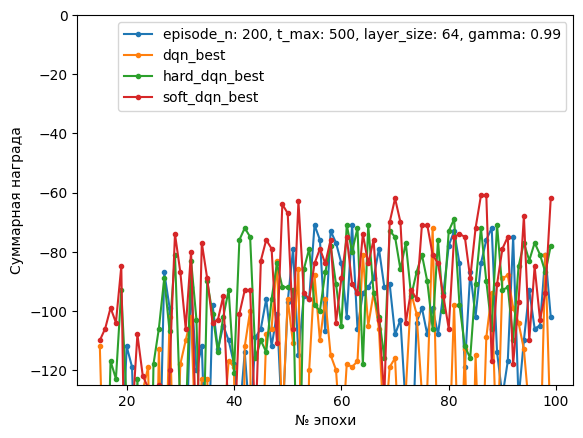

In [84]:
dqn_best = dqn_list[0]
hard_dqn_best = dqn_hard_list[0]
soft_dqn_best = dqn_soft_list[0]
for exp in ddqn_list[:1]:
    plt.plot(range(15, 100), exp["rewards"][15:100], marker='o', label=exp["label"], markersize=3)


plt.plot(range(15, 100), dqn_best["rewards"][15:100], marker='o', label="dqn_best", markersize=3)
plt.plot(range(15, 100), hard_dqn_best["rewards"][15:100], marker='o', label="hard_dqn_best", markersize=3)
plt.plot(range(15, 100), soft_dqn_best["rewards"][15:100], marker='o', label="soft_dqn_best", markersize=3)

plt.xlabel('№ эпохи')
plt.ylim(-125, 0)
plt.ylabel('Суммарная награда')
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.show()